# Time Results

In [1]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../src')
import raybay
from utils import get_time_df, get_percent_diff

## With 100 Iterations

In [2]:
full_df = pd.concat([get_time_df(plan_type) for plan_type in ['random', 'bayes']])
full_df.groupby('plan_type')['plan_time'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_type,,,,,,,,
bayes,10.0,2.377229,0.537746,1.806067,2.063525,2.268685,2.528324,3.644062
random,10.0,2.011782,0.541586,1.307687,1.563225,1.930469,2.413470,2.880300


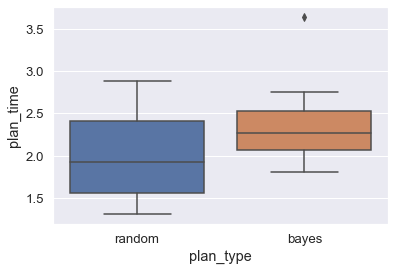

In [3]:
sns.boxplot(x='plan_type', y='plan_time', data=full_df);

### Compare plan timing

In [4]:
def get_time_diff(row):
    return 60.0*(row['plan_time_x'] - row['plan_time_y'])

def get_compare(plan, ref, stop=False):
    df = pd.merge(
        get_time_df(plan, stop),
        get_time_df(ref, stop),
        on=['patient'])
    df['percent_diff'] = df.apply(get_time_diff, axis=1)
    return df[['patient', 'percent_diff']]

compare_df = get_compare('random', 'bayes')
compare_df['percent_diff'].describe()

count    10.000000
mean    -21.926779
std      19.000947
min     -45.825691
25%     -31.746161
50%     -25.884265
75%     -17.547999
max      25.342210
Name: percent_diff, dtype: float64

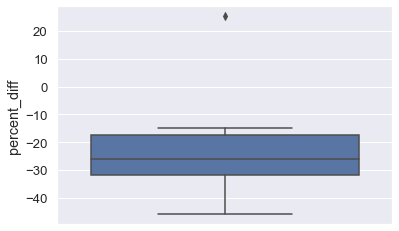

In [5]:
sns.boxplot(y='percent_diff', data=compare_df);

## With Stopping Conditions

In [6]:
stop_df = pd.concat([get_time_df(plan_type, stop=True) for plan_type in ['random', 'bayes']])
stop_df.groupby('plan_type').describe()

plan_time                                                    \
              count      mean       std       min       25%       50%   
plan_type                                                               
bayes          10.0  0.769138  0.390137  0.336623  0.506783  0.673120   
random         10.0  0.539620  0.156573  0.338744  0.444567  0.533956   

                              plan_iter                                      \
                75%       max     count  mean        std   min    25%   50%   
plan_type                                                                     
bayes      0.896484  1.458116      10.0  36.8  14.148420  20.0  28.50  34.0   
random     0.610334  0.875630      10.0  27.3   4.967673  20.0  23.25  29.0   

                       
            75%   max  
plan_type              
bayes      43.0  62.0  
random     30.0  33.0

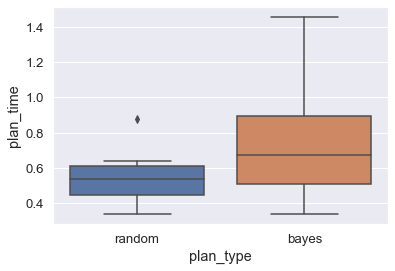

In [7]:
sns.boxplot(x='plan_type', y='plan_time', data=stop_df);

### Compare to 100 iterations

In [8]:
def get_time_diff(row):
    return get_percent_diff(row, 'plan_time_stop', 'plan_time_full')

compare_df = pd.merge(
    full_df,
    stop_df,
    on=['patient', 'plan_type'],
    suffixes=['_full', '_stop']
)
compare_df['percent_diff'] = compare_df.apply(get_time_diff, axis=1)
compare_df.groupby('plan_type')['percent_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
plan_type,,,,,,,,
bayes,10.0,-68.119919,13.384831,-83.865829,-77.946778,-70.325639,-62.994082,-42.513548
random,10.0,-72.786692,5.145727,-81.960607,-76.617420,-70.874817,-69.767940,-67.168159


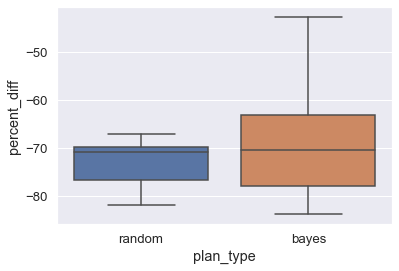

In [9]:
sns.boxplot(x='plan_type', y='percent_diff', data=compare_df);